In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
alpha = 0.05

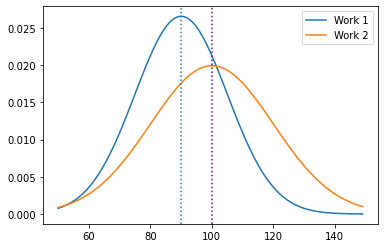

In [13]:


x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Work 1')
plt.plot(x, y2, label = 'Work 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'purple')

plt.legend()

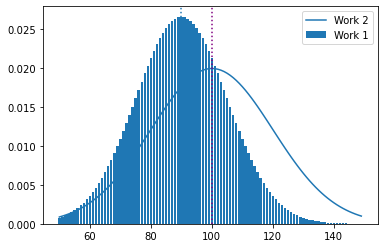

In [14]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.bar(x, y1, label = 'Work 1')
plt.plot(x, y2, label = 'Work 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'purple')

plt.legend()

In [18]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [16]:
if p < alpha:
    print(" Null hypothesis is wrong")
else:
    print("Null hypothesis is right")

 Null hypothesis is wrong


In [ ]:
# Exercise 2

In [20]:
from pydataset import data
miles_p_gallion = data('mpg')

In [22]:
miles_p_gallion.head().T

,1,2,3,4,5
manufacturer,audi,audi,audi,audi,audi
model,a4,a4,a4,a4,a4
displ,1.8,1.8,2.0,2.0,2.8
year,1999,1999,2008,2008,1999
cyl,4,4,4,4,6
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5)
drv,f,f,f,f,f
cty,18,21,20,21,16
hwy,29,29,31,30,26
fl,p,p,p,p,p


a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

What are we comparing?
One sample or two sample?
One tailed or two tailed?

In [16]:
# H_0: There is no difference in fuel-efficiency in cars from 2008 and 1999
# H_a: There is a difference in fuel-efficiency in cars from 2008 and 1999

In [24]:
miles_p_gallion['avg_fe'] = stats.hmean(miles_p_gallion[['cty', 'hwy']], axis=1)
miles_p_gallion.head().T

,1,2,3,4,5
manufacturer,audi,audi,audi,audi,audi
model,a4,a4,a4,a4,a4
displ,1.8,1.8,2.0,2.0,2.8
year,1999,1999,2008,2008,1999
cyl,4,4,4,4,6
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5)
drv,f,f,f,f,f
cty,18,21,20,21,16
hwy,29,29,31,30,26
fl,p,p,p,p,p


In [28]:
fe_2008 = miles_p_gallion[mpg.year == 2008].avg_fe
fe_1999 = miles_p_gallion[mpg.year == 1999].avg_fe

<AxesSubplot:>

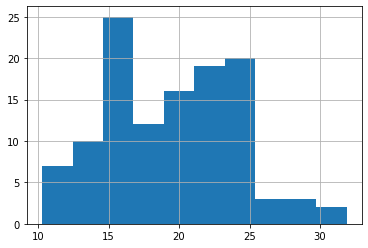

In [33]:
fe_2008.hist()

<AxesSubplot:>

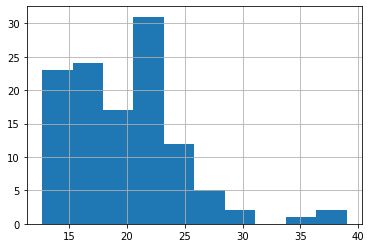

In [20]:
fe_1999.hist()

In [21]:
fe_2008.count()

117

In [22]:
fe_1999.count() 

117

In [23]:
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [24]:
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [39]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [31]:
if p < alpha:
    print('Null hypothesis is wrong')
else:
    print('Null hypothesis is right')

Null hypothesis is wrong


In [28]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

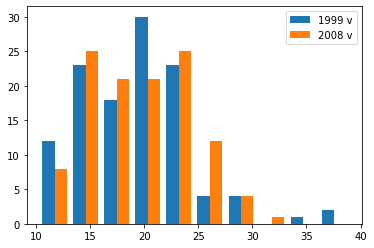

In [41]:
plt.hist([fe_1999, fe_2008], label=['1999 v', '2008 v'])
plt.legend(loc="upper right")

b. Are compact cars more fuel-efficient than the average car?

In [30]:
# H_0: MPG for compact cars <= mpg for the average car
# H_a: MPG for compact cars > mpg for the average car

In [47]:
fe_compact = miles_p_gallion[mpg['class'] == 'compact'].avg_fe
pop_mean = miles_p_gallion.avg_fe.mean()

In [48]:
pop_mean

19.585525317633177

In [49]:
fe_compact.mean()

23.500416808701296

<AxesSubplot:>

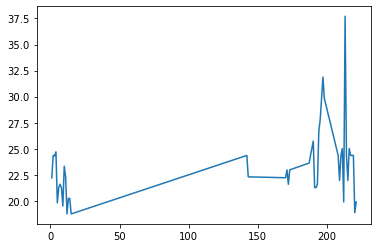

In [50]:
fe_compact.plot()

<AxesSubplot:>

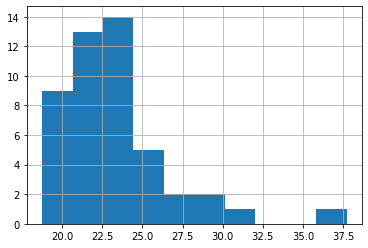

In [52]:
fe_compact.hist()

In [54]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [55]:
if (p/2 < alpha) and t > 0:
    print('Null hypothesis is wrong')

Null hypothesis is wrong


In [64]:
miles_p_gallion.head().T

,1,2,3,4,5
manufacturer,audi,audi,audi,audi,audi
model,a4,a4,a4,a4,a4
displ,1.8,1.8,2.0,2.0,2.8
year,1999,1999,2008,2008,1999
cyl,4,4,4,4,6
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5)
drv,f,f,f,f,f
cty,18,21,20,21,16
hwy,29,29,31,30,26
fl,p,p,p,p,p


In [66]:
miles_p_gallion.tail().T

,230,231,232,233,234
manufacturer,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen
model,passat,passat,passat,passat,passat
displ,2.0,2.0,2.8,2.8,3.6
year,2008,2008,1999,1999,2008
cyl,4,4,6,6,6
trans,auto(s6),manual(m6),auto(l5),manual(m5),auto(s6)
drv,f,f,f,f,f
cty,19,21,16,18,17
hwy,28,29,26,26,26
fl,p,p,p,p,p


In [63]:
miles_p_gallion.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [65]:
miles_p_gallion.trans.all()

True

In [67]:
fe_auto = miles_p_gallion[mpg.trans.str.contains('auto')].avg_fe
fe_manual = miles_p_gallion[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

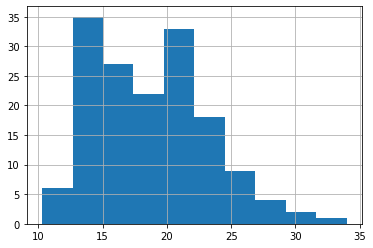

In [44]:
fe_auto.hist()

<AxesSubplot:>

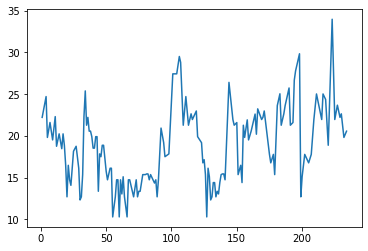

In [68]:
fe_auto.plot()

<AxesSubplot:>

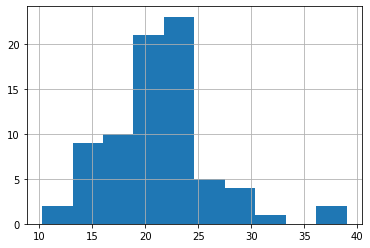

In [45]:
fe_manual.hist()

<AxesSubplot:>

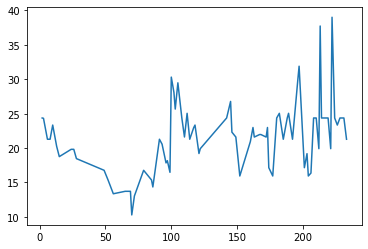

In [69]:
fe_manual.plot()

In [70]:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [71]:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [72]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [73]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [74]:
miles_p_gallion['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [77]:
miles_p_gallion.T

,1,2,3,4,5,6,7,8,9,10,...,225,226,227,228,229,230,231,232,233,234
manufacturer,audi,audi,audi,audi,audi,audi,audi,audi,audi,audi,...,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen
model,a4,a4,a4,a4,a4,a4,a4,a4 quattro,a4 quattro,a4 quattro,...,new beetle,new beetle,new beetle,passat,passat,passat,passat,passat,passat,passat
displ,1.8,1.8,2.0,2.0,2.8,2.8,3.1,1.8,1.8,2.0,...,2.0,2.5,2.5,1.8,1.8,2.0,2.0,2.8,2.8,3.6
year,1999,1999,2008,2008,1999,1999,2008,1999,1999,2008,...,1999,2008,2008,1999,1999,2008,2008,1999,1999,2008
cyl,4,4,4,4,6,6,6,4,4,4,...,4,5,5,4,4,4,4,6,6,6
trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5),manual(m5),auto(av),manual(m5),auto(l5),manual(m6),...,auto(l4),manual(m5),auto(s6),manual(m5),auto(l5),auto(s6),manual(m6),auto(l5),manual(m5),auto(s6)
drv,f,f,f,f,f,f,f,4,4,4,...,f,f,f,f,f,f,f,f,f,f
cty,18,21,20,21,16,18,18,18,16,20,...,19,20,20,21,18,19,21,16,18,17
hwy,29,29,31,30,26,26,27,26,25,28,...,26,28,29,29,29,28,29,26,26,26
fl,p,p,p,p,p,p,p,p,p,p,...,r,r,r,p,p,p,p,p,p,p


Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

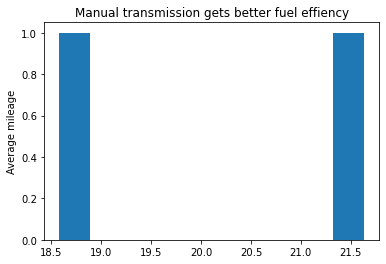

In [79]:
miles_p_gallion.groupby('transmission_type').avg_fe.mean().plot.hist()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')

Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

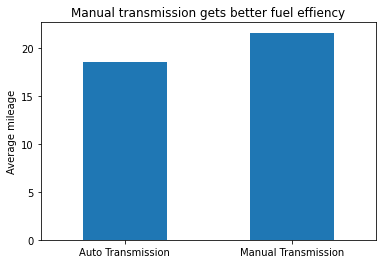

In [80]:
miles_p_gallion.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')